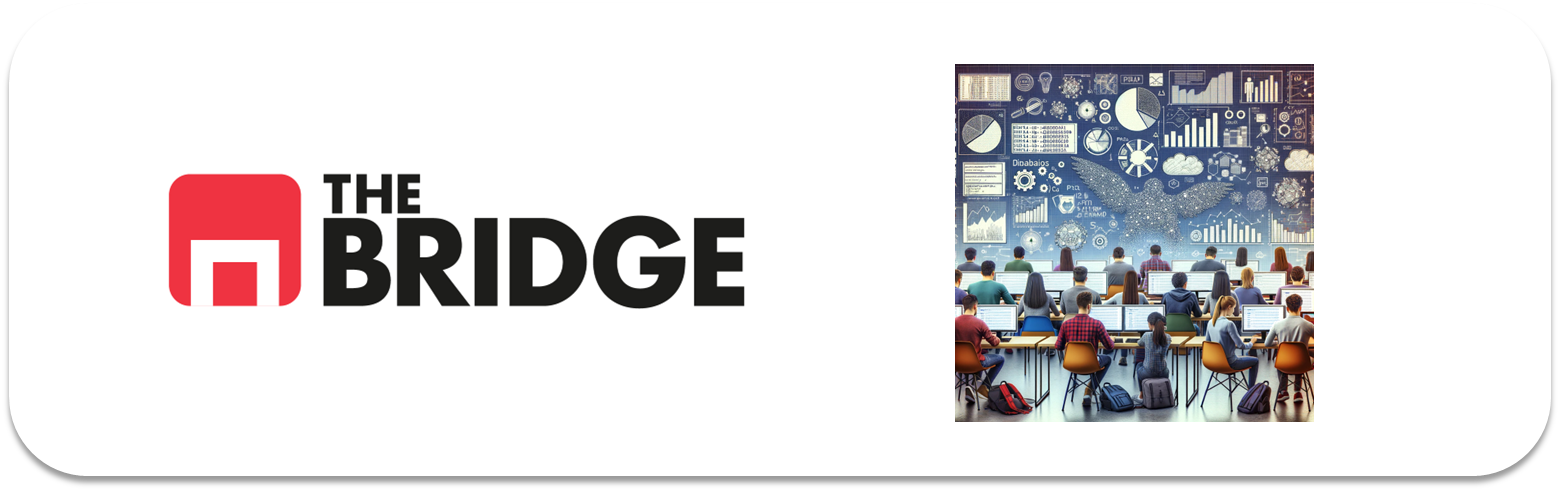

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import seaborn as sns

In [8]:

casas = pd.read_csv('data\hard_to_find\obligatoria_hard.csv' , sep='|')

<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\lupep\AppData\Local\Temp\ipykernel_24284\3640764034.py:1: SyntaxWarning: invalid escape sequence '\h'
  casas = pd.read_csv('data\hard_to_find\obligatoria_hard.csv' , sep='|')


In [9]:
casas.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


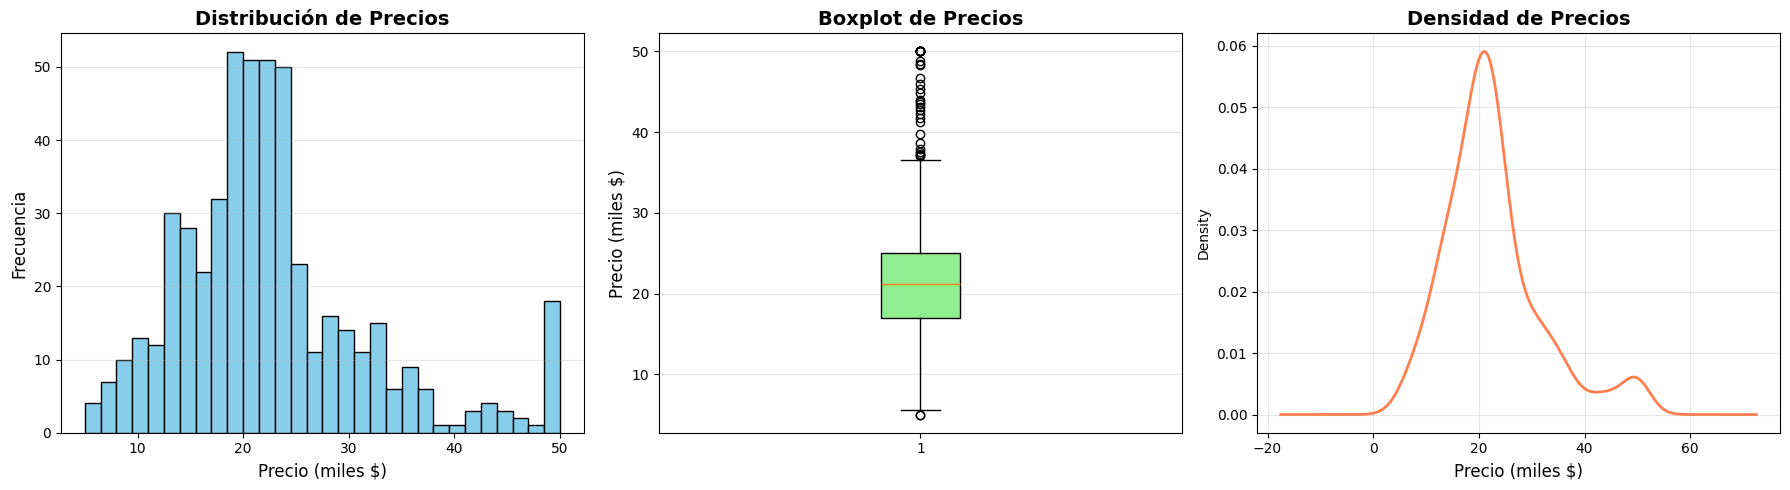

In [29]:


# figura
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histograma
axes[0].hist(casas['MEDV'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Distribución de Precios', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Precio (miles $)', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Boxplot
axes[1].boxplot(casas['MEDV'], patch_artist=True, 
                boxprops=dict(facecolor='lightgreen'))
axes[1].set_title('Boxplot de Precios', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Precio (miles $)', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

# Densidad
casas['MEDV'].plot(kind='density', ax=axes[2], color='coral', linewidth=2)
axes[2].set_title('Densidad de Precios', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Precio (miles $)', fontsize=12)
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [31]:
# Separar las características (X) del objetivo (y)
X = casas.drop('MEDV', axis=1)  # Todas las columnas EXCEPTO MEDV
y = casas['MEDV']                # Solo la columna MEDV

print("=== DIMENSIONES ===")
print(f"X (features): {X.shape}")   # (506, 12) = 506 casas, 12 características
print(f"y (target): {y.shape}")   

=== DIMENSIONES ===
X (features): (506, 12)
y (target): (506,)


In [39]:
from sklearn.model_selection import train_test_split

# 1. Separar features (X) y target (y)
X = casas.drop('MEDV', axis=1)  # Todas las columnas menos MEDV
y = casas['MEDV']               # Solo MEDV

# 2. Hacer el split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,       # 20% para test
    random_state=42      
)


print(" DIVISIÓN DE DATOS ")
print(f"Total de datos: {len(casas)} casas")
print(f"Train: {len(X_train)} casas ({len(X_train)/len(casas)*100:.1f}%)")
print(f"Test: {len(X_test)} casas ({len(X_test)/len(casas)*100:.1f}%)")

print(" DIMENSIONES ")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

 DIVISIÓN DE DATOS 
Total de datos: 506 casas
Train: 404 casas (79.8%)
Test: 102 casas (20.2%)
 DIMENSIONES 
X_train: (404, 12)
X_test: (102, 12)
y_train: (404,)
y_test: (102,)


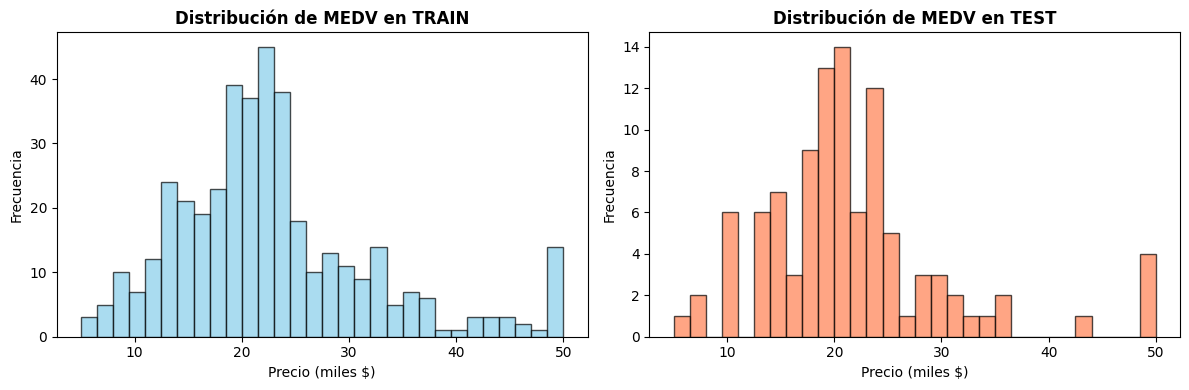

In [36]:
# Ver la distribución de precios en train vs test
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(y_train, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribución de MEDV en TRAIN', fontweight='bold')
axes[0].set_xlabel('Precio (miles $)')
axes[0].set_ylabel('Frecuencia')

axes[1].hist(y_test, bins=30, color='coral', edgecolor='black', alpha=0.7)
axes[1].set_title('Distribución de MEDV en TEST', fontweight='bold')
axes[1].set_xlabel('Precio (miles $)')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [41]:
print(" INFORMACIÓN GENERAL DEL DATASET ")
print(f"Dimensiones: {casas.shape}")
print(f"Tipos de datos:")
print(casas.dtypes)


 INFORMACIÓN GENERAL DEL DATASET 
Dimensiones: (506, 13)
Tipos de datos:
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object


In [43]:
print(f"Valores nulos:")
print(casas.isnull().sum())


Valores nulos:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64


In [44]:
print(f"Estadísticas descriptivas:")
print(casas.describe())

Estadísticas descriptivas:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   


 CORRELACIÓN CON MEDV (TARGET)
MEDV       1.000000
RM         0.695360
ZN         0.360445
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


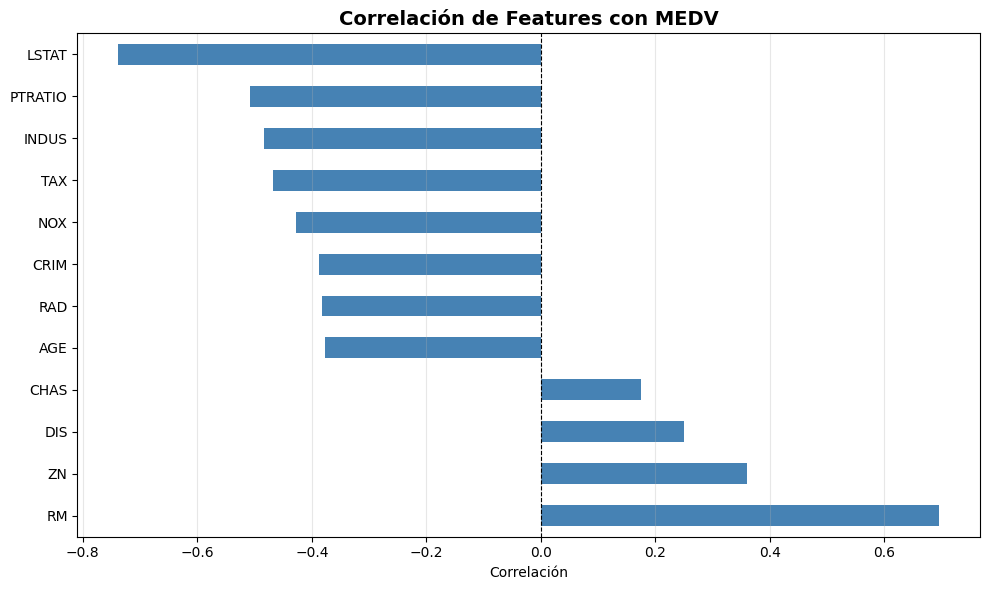

In [46]:
# Calcular correlaciones con MEDV
correlaciones = casas.corr()['MEDV'].sort_values(ascending=False)

print(" CORRELACIÓN CON MEDV (TARGET)")
print(correlaciones)

# Visualizar con un gráfico de barras
plt.figure(figsize=(10, 6))
correlaciones.drop('MEDV').plot(kind='barh', color='steelblue')
plt.title('Correlación de Features con MEDV', fontsize=14, fontweight='bold')
plt.xlabel('Correlación')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

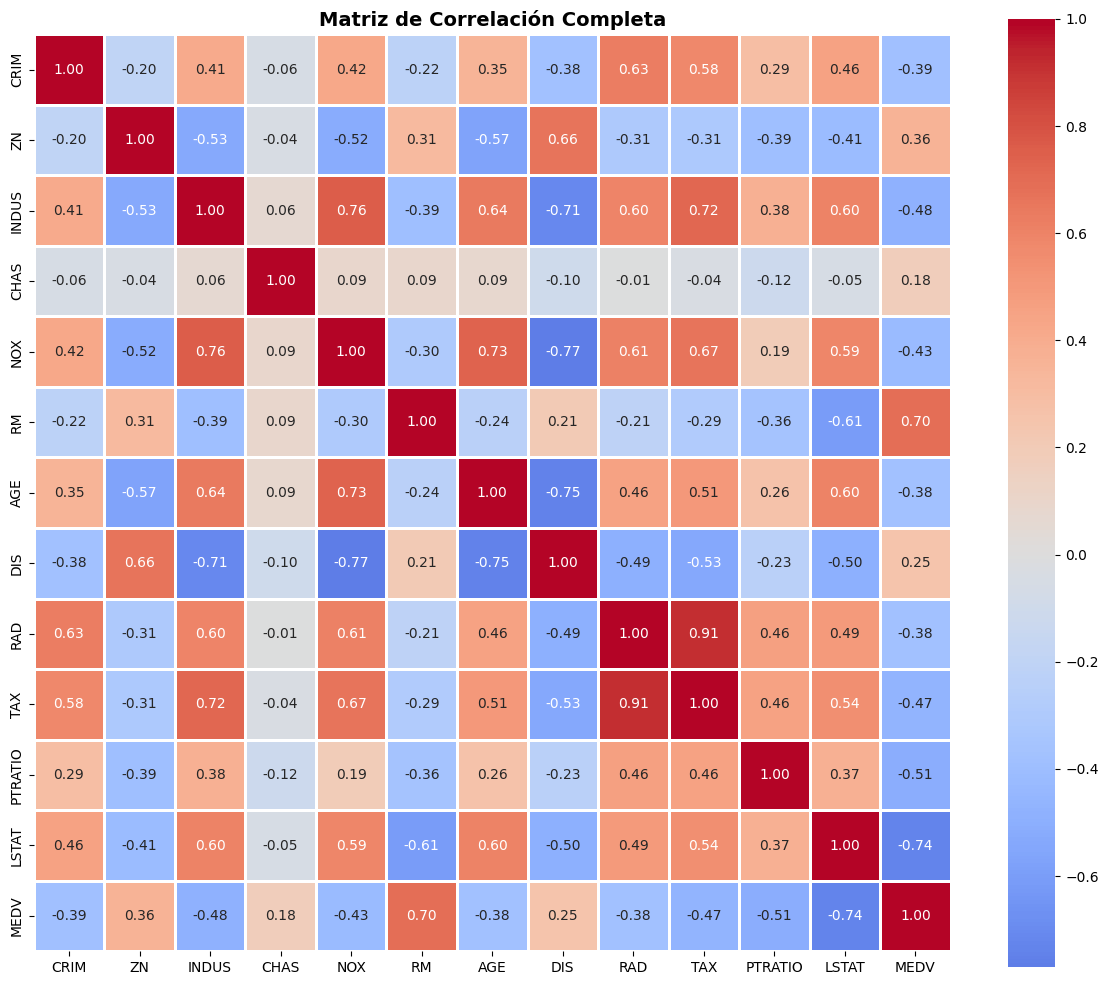

In [48]:
# Matriz de correlación completa
plt.figure(figsize=(12, 10))
sns.heatmap(casas.corr(), annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Matriz de Correlación Completa', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

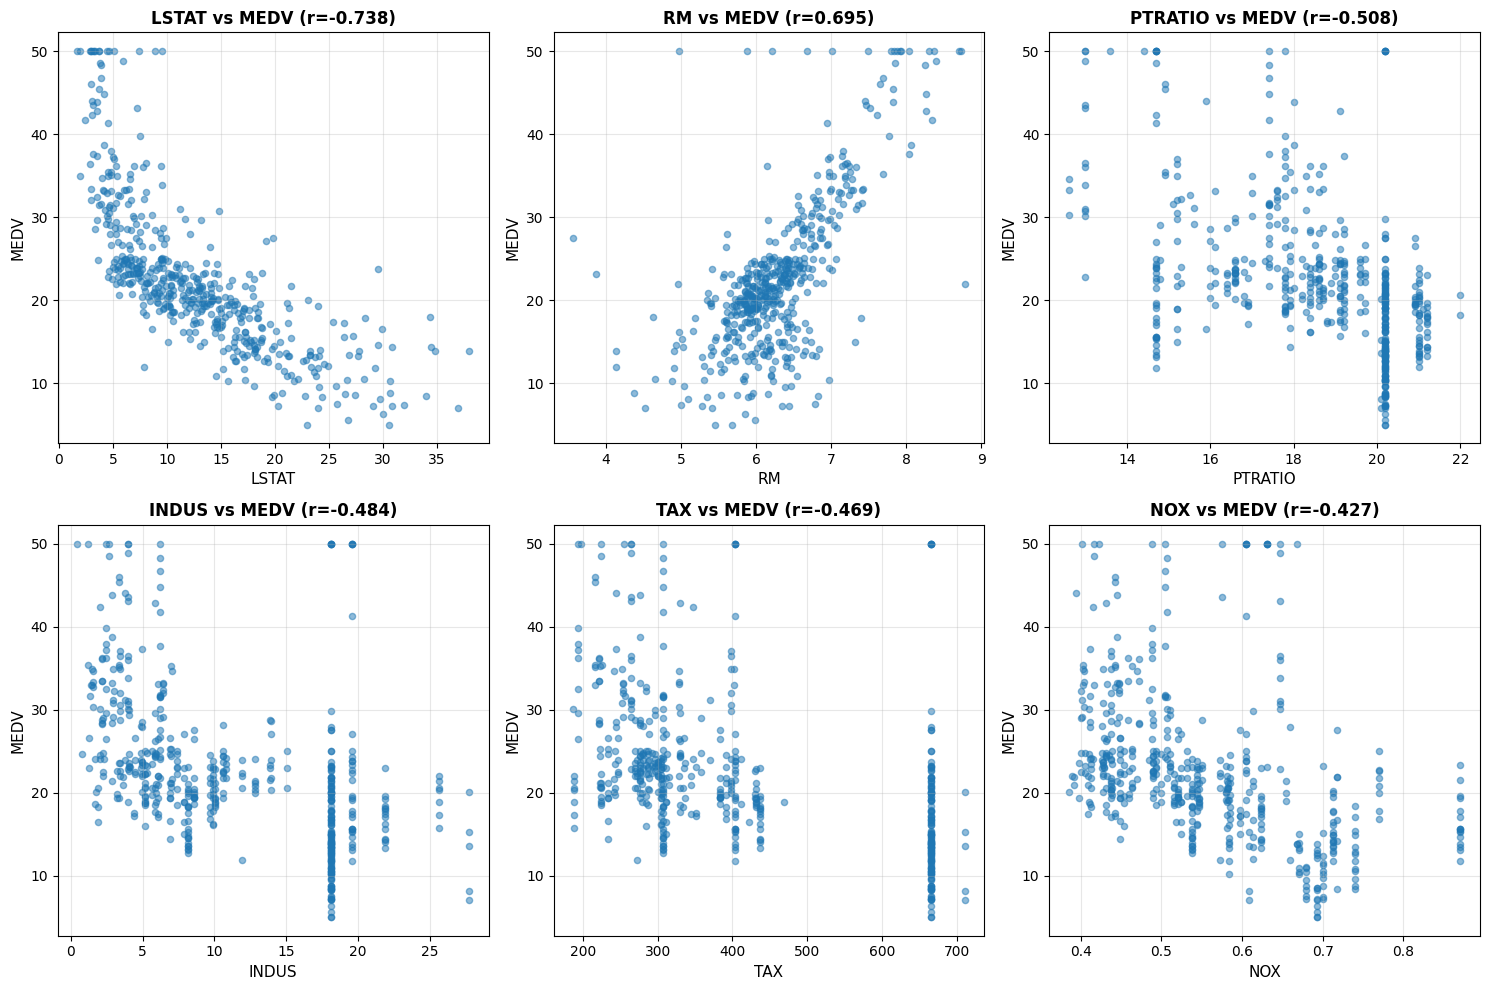

In [49]:
# Seleccionar las 6 features con mayor correlación absoluta
top_features = correlaciones.abs().sort_values(ascending=False)[1:7].index

# Crear scatter plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(top_features):
    axes[i].scatter(casas[feature], casas['MEDV'], alpha=0.5, s=20)
    axes[i].set_xlabel(feature, fontsize=11)
    axes[i].set_ylabel('MEDV', fontsize=11)
    axes[i].set_title(f'{feature} vs MEDV (r={correlaciones[feature]:.3f})', 
                     fontweight='bold')
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [51]:
# Basándonos en el análisis, seleccionamos features
# Features con correlación alta (|r| > 0.4 por ejemplo)
features_seleccionadas = correlaciones[abs(correlaciones) > 0.4].index.tolist()
features_seleccionadas.remove('MEDV')  # Quitar el target

print(" FEATURES SELECCIONADAS ")
print(f"Total: {len(features_seleccionadas)} features")
print(features_seleccionadas)

# Crear nuevos datasets solo con las features seleccionadas
X_train_selected = X_train[features_seleccionadas]
X_test_selected = X_test[features_seleccionadas]

print(f"Nuevas dimensiones:")
print(f"X_train: {X_train_selected.shape}")
print(f"X_test: {X_test_selected.shape}")

 FEATURES SELECCIONADAS 
Total: 6 features
['RM', 'NOX', 'TAX', 'INDUS', 'PTRATIO', 'LSTAT']
Nuevas dimensiones:
X_train: (404, 6)
X_test: (102, 6)


In [53]:
print(" ESCALA DE LAS FEATURES SELECCIONADAS ")

features_seleccionadas = ['RM', 'NOX', 'TAX', 'INDUS', 'PTRATIO', 'LSTAT']

# Ver estadísticas de cada feature
estadisticas = X_train[features_seleccionadas].describe()
print(estadisticas)

print(" RANGOS DE VALORES")
for feature in features_seleccionadas:
    min_val = X_train[feature].min()
    max_val = X_train[feature].max()
    print(f"{feature:10} | Rango: [{min_val:8.2f} , {max_val:8.2f}] → Amplitud: {max_val - min_val:.2f}")

 ESCALA DE LAS FEATURES SELECCIONADAS 
               RM         NOX         TAX       INDUS     PTRATIO       LSTAT
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000
mean     6.315891    0.556484  404.032178   10.985050   18.318317   12.457351
std      0.709452    0.117704  166.172655    6.894618    2.228701    7.110381
min      3.863000    0.385000  187.000000    0.740000   12.600000    1.730000
25%      5.890500    0.452000  279.000000    5.130000   16.800000    6.772500
50%      6.210000    0.538000  330.000000    8.560000   18.700000   10.925000
75%      6.636750    0.631000  666.000000   18.100000   20.200000   16.372500
max      8.780000    0.871000  711.000000   27.740000   22.000000   37.970000
 RANGOS DE VALORES
RM         | Rango: [    3.86 ,     8.78] → Amplitud: 4.92
NOX        | Rango: [    0.39 ,     0.87] → Amplitud: 0.49
TAX        | Rango: [  187.00 ,   711.00] → Amplitud: 524.00
INDUS      | Rango: [    0.74 ,    27.74] → Amplitud: 27.00
P

In [54]:
from sklearn.preprocessing import StandardScaler

# 1. Crear el escalador
scaler = StandardScaler()

# 2. IMPORTANTE: Entrenar el scaler SOLO con datos de TRAIN
scaler.fit(X_train_selected)

# 3. Transformar TRAIN y TEST
X_train_scaled = scaler.transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# 4. Convertir de nuevo a DataFrame (para mantener los nombres de columnas)
X_train_scaled = pd.DataFrame(X_train_scaled, 
                               columns=X_train_selected.columns,
                               index=X_train_selected.index)

X_test_scaled = pd.DataFrame(X_test_scaled, 
                              columns=X_test_selected.columns,
                              index=X_test_selected.index)

print(" DATOS ESCALADOS ")
print("Dimensiones:")
print(f"  X_train_scaled: {X_train_scaled.shape}")
print(f"  X_test_scaled: {X_test_scaled.shape}")

 DATOS ESCALADOS 
Dimensiones:
  X_train_scaled: (404, 6)
  X_test_scaled: (102, 6)


In [56]:
print("\n=== VERIFICACIÓN DEL ESCALADO ===\n")

# Antes del escalado
print("ANTES del escalado (X_train_selected):")
print(X_train_selected.describe().loc[['mean', 'std']])

print("\nDESPUÉS del escalado (X_train_scaled):")
print(X_train_scaled.describe().loc[['mean', 'std']])

print(" Todas las medias deben estar cerca de 0")
print(" Todas las desviaciones deben estar cerca de 1")


=== VERIFICACIÓN DEL ESCALADO ===

ANTES del escalado (X_train_selected):
            RM       NOX         TAX      INDUS    PTRATIO      LSTAT
mean  6.315891  0.556484  404.032178  10.985050  18.318317  12.457351
std   0.709452  0.117704  166.172655   6.894618   2.228701   7.110381

DESPUÉS del escalado (X_train_scaled):
                RM           NOX           TAX         INDUS       PTRATIO  \
mean -2.616169e-16 -5.111423e-16 -1.516938e-16 -4.177077e-17  8.519038e-16   
std   1.001240e+00  1.001240e+00  1.001240e+00  1.001240e+00  1.001240e+00   

             LSTAT  
mean -1.791746e-16  
std   1.001240e+00  
 Todas las medias deben estar cerca de 0
 Todas las desviaciones deben estar cerca de 1


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Crear el modelo
modelo = LinearRegression()



In [61]:
modelo.fit(X_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [66]:

print("COEFICIENTES DEL MODELO")


# Intercepto (precio base)
print(f"Intercepto : {modelo.intercept_:.3f}")
print("  → Precio base cuando todas las features son 0")

# Coeficientes de cada feature
print("\nCoeficientes de las features:")
print("-" * 60)

coeficientes = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coeficiente': modelo.coef_
}).sort_values('Coeficiente', key=abs, ascending=False)

for _, row in coeficientes.iterrows():
    feature = row['Feature']
    coef = row['Coeficiente']
    
    if coef > 0:
        print(f"  {feature:10} | {coef:+.3f} → ↑ {feature} aumenta el precio")
    else:
        print(f"  {feature:10} | {coef:+.3f} → ↑ {feature} disminuye el precio")

COEFICIENTES DEL MODELO
Intercepto : 22.797
  → Precio base cuando todas las features son 0

Coeficientes de las features:
------------------------------------------------------------
  LSTAT      | -3.874 → ↑ LSTAT disminuye el precio
  RM         | +3.641 → ↑ RM aumenta el precio
  PTRATIO    | -1.836 → ↑ PTRATIO disminuye el precio
  INDUS      | +0.840 → ↑ INDUS aumenta el precio
  TAX        | -0.756 → ↑ TAX disminuye el precio
  NOX        | -0.343 → ↑ NOX disminuye el precio


In [72]:

print("PREDICCIONES")


# Predecir en train
y_train_pred = modelo.predict(X_train_scaled)

# Predecir en test
y_test_pred = modelo.predict(X_test_scaled)

print(f"\n Predicciones realizadas:")
print(f"   Train: {len(y_train_pred)} predicciones")
print(f"   Test: {len(y_test_pred)} predicciones")

# Ver algunos ejemplos
print("\n Ejemplos de predicciones en TEST ")
comparacion = pd.DataFrame({
    'Real': y_test.values[:5],
    'Predicho': y_test_pred[:5],
    'Error': y_test.values[:5] - y_test_pred[:5]
})
print(comparacion)

PREDICCIONES

 Predicciones realizadas:
   Train: 404 predicciones
   Test: 102 predicciones

 Ejemplos de predicciones en TEST 
   Real   Predicho     Error
0  23.6  26.374950 -2.774950
1  32.4  30.976040  1.423960
2  13.6  17.045773 -3.445773
3  22.8  25.413005 -2.613005
4  16.1  17.739026 -1.639026


In [74]:

print("MÉTRICAS DE EVALUACIÓN")


# Métricas en TRAIN
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Métricas en TEST
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\n TRAIN:")
print(f"   R² Score:  {r2_train:.4f}  ← Qué % de varianza explica (0-1, mejor=1)")
print(f"   RMSE:      {rmse_train:.3f}k$ ← Error promedio en miles de $")
print(f"   MAE:       {mae_train:.3f}k$ ← Error absoluto promedio")

print("\n TEST:")
print(f"   R² Score:  {r2_test:.4f}  ← Qué % de varianza explica")
print(f"   RMSE:      {rmse_test:.3f}k$ ← Error promedio")
print(f"   MAE:       {mae_test:.3f}k$ ← Error absoluto promedio")

# Interpretación
print("\n INTERPRETACIÓN:")
if r2_test > 0.7:
    print(f"    R² = {r2_test:.2%} → Buen modelo")
elif r2_test > 0.5:
    print(f"    R² = {r2_test:.2%} → Modelo aceptable")
else:
    print(f"    R² = {r2_test:.2%} → Modelo pobre")

print(f"   → El modelo se equivoca en promedio ±{rmse_test:.1f}k$")

MÉTRICAS DE EVALUACIÓN

 TRAIN:
   R² Score:  0.6907  ← Qué % de varianza explica (0-1, mejor=1)
   RMSE:      5.184k$ ← Error promedio en miles de $
   MAE:       3.635k$ ← Error absoluto promedio

 TEST:
   R² Score:  0.6210  ← Qué % de varianza explica
   RMSE:      5.272k$ ← Error promedio
   MAE:       3.354k$ ← Error absoluto promedio

 INTERPRETACIÓN:
    R² = 62.10% → Modelo aceptable
   → El modelo se equivoca en promedio ±5.3k$


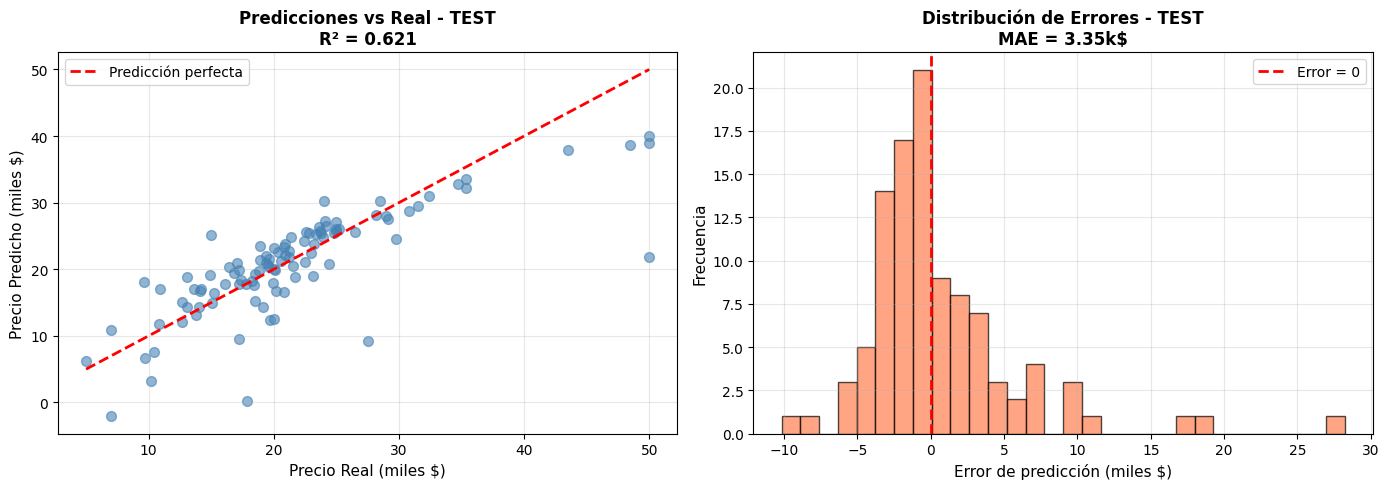

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Predicciones vs Valores Reales (TEST)
axes[0].scatter(y_test, y_test_pred, alpha=0.6, s=50, color='steelblue')
axes[0].plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 
             'r--', linewidth=2, label='Predicción perfecta')
axes[0].set_xlabel('Precio Real (miles $)', fontsize=11)
axes[0].set_ylabel('Precio Predicho (miles $)', fontsize=11)
axes[0].set_title(f'Predicciones vs Real - TEST\nR² = {r2_test:.3f}', 
                  fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Gráfico 2: Distribución de errores
errores = y_test - y_test_pred
axes[1].hist(errores, bins=30, color='coral', edgecolor='black', alpha=0.7)
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Error = 0')
axes[1].set_xlabel('Error de predicción (miles $)', fontsize=11)
axes[1].set_ylabel('Frecuencia', fontsize=11)
axes[1].set_title(f'Distribución de Errores - TEST\nMAE = {mae_test:.2f}k$', 
                  fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

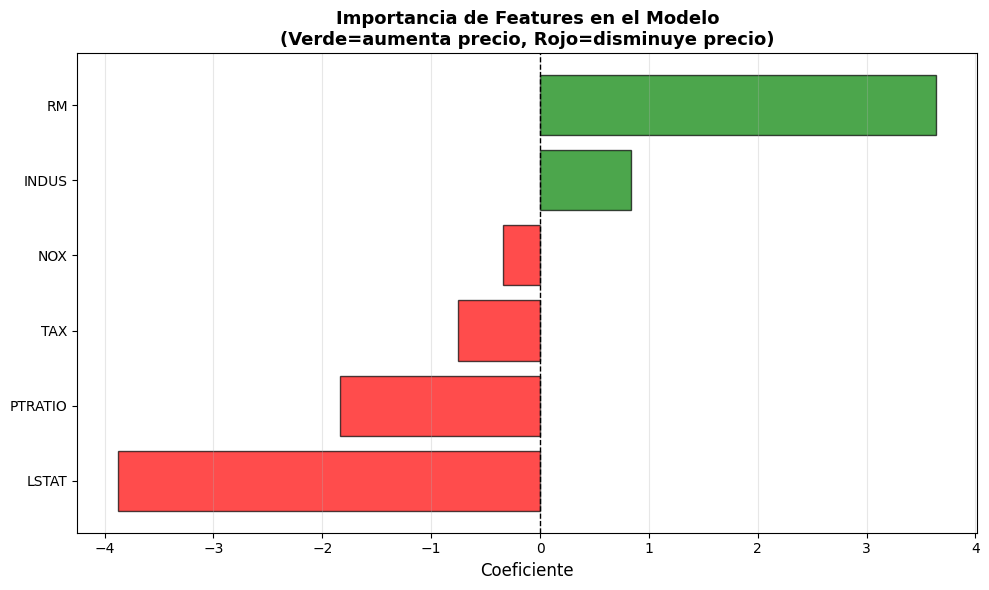

In [77]:
# Gráfico de importancia de coeficientes
plt.figure(figsize=(10, 6))

coeficientes_sorted = coeficientes.sort_values('Coeficiente')
colors = ['red' if c < 0 else 'green' for c in coeficientes_sorted['Coeficiente']]

plt.barh(coeficientes_sorted['Feature'], 
         coeficientes_sorted['Coeficiente'], 
         color=colors, alpha=0.7, edgecolor='black')
plt.xlabel('Coeficiente', fontsize=12)
plt.title('Importancia de Features en el Modelo\n(Verde=aumenta precio, Rojo=disminuye precio)', 
          fontweight='bold', fontsize=13)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [80]:
# 1. COEFICIENTES DEL MODELO
print("\n1. COEFICIENTES DEL MODELO DE REGRESIÓN LINEAL")


# Crear DataFrame con los coeficientes
coeficientes_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coeficiente': modelo.coef_,
    'Abs_Coeficiente': np.abs(modelo.coef_)
}).sort_values('Abs_Coeficiente', ascending=False)

print(f"\nIntercepto (β₀): {modelo.intercept_:.4f}")
print("  → Precio base cuando todas las features escaladas son 0")
print("  → En el contexto de datos escalados, representa el precio promedio")


print(f"{'Feature':<12} | {'Coeficiente':>12} | {'Impacto':>12} | Interpretación")


for _, row in coeficientes_df.iterrows():
    feature = row['Feature']
    coef = row['Coeficiente']
    abs_coef = row['Abs_Coeficiente']
    
    # Clasificar el impacto
    if abs_coef > 3:
        impacto = "MUY ALTO"
    elif abs_coef > 2:
        impacto = "ALTO"
    elif abs_coef > 1:
        impacto = "MEDIO"
    else:
        impacto = "BAJO"
    
    # Dirección del impacto
    direccion = "↑ precio" if coef > 0 else "↓ precio"
    
    print(f"{feature:<12} | {coef:+12.4f} | {impacto:>12} | {direccion}")




1. COEFICIENTES DEL MODELO DE REGRESIÓN LINEAL

Intercepto (β₀): 22.7965
  → Precio base cuando todas las features escaladas son 0
  → En el contexto de datos escalados, representa el precio promedio
Feature      |  Coeficiente |      Impacto | Interpretación
LSTAT        |      -3.8738 |     MUY ALTO | ↓ precio
RM           |      +3.6410 |     MUY ALTO | ↑ precio
PTRATIO      |      -1.8364 |        MEDIO | ↓ precio
INDUS        |      +0.8395 |         BAJO | ↑ precio
TAX          |      -0.7558 |         BAJO | ↓ precio
NOX          |      -0.3434 |         BAJO | ↓ precio


In [82]:
print("\n2. INTERPRETACIÓN DETALLADA DE CADA FEATURE")


# Recuperar correlación original con MEDV
correlaciones_originales = casas.corr()['MEDV'][coeficientes_df['Feature'].values]

for _, row in coeficientes_df.iterrows():
    feature = row['Feature']
    coef = row['Coeficiente']
    corr = correlaciones_originales[feature]
    
    print(f"\n {feature}:")
    print(f"   Coeficiente: {coef:+.4f}")
    print(f"   Correlación original: {corr:+.4f}")
    
    # Interpretación específica por feature
    interpretaciones = {
        'RM': 'Más habitaciones → casas más grandes → precio más alto',
        'LSTAT': 'Mayor % de población pobre → zona menos deseable → precio más bajo',
        'PTRATIO': 'Más alumnos por profesor → peor educación → zona menos atractiva → precio más bajo',
        'INDUS': 'Más zona industrial → menos residencial → precio más bajo',
        'TAX': 'Más impuestos → menos atractivo → precio más bajo',
        'NOX': 'Más contaminación → peor calidad de aire → precio más bajo'
    }
    
    if feature in interpretaciones:
        print(f"    {interpretaciones[feature]}")
    
    # Consistencia entre coeficiente y correlación
    consistente = (coef > 0 and corr > 0) or (coef < 0 and corr < 0)
    if consistente:
        print(f"    Coeficiente consistente con la correlación")
    else:
        print(f"    Inconsistencia detectada (revisar)")


2. INTERPRETACIÓN DETALLADA DE CADA FEATURE

 LSTAT:
   Coeficiente: -3.8738
   Correlación original: -0.7377
    Mayor % de población pobre → zona menos deseable → precio más bajo
    Coeficiente consistente con la correlación

 RM:
   Coeficiente: +3.6410
   Correlación original: +0.6954
    Más habitaciones → casas más grandes → precio más alto
    Coeficiente consistente con la correlación

 PTRATIO:
   Coeficiente: -1.8364
   Correlación original: -0.5078
    Más alumnos por profesor → peor educación → zona menos atractiva → precio más bajo
    Coeficiente consistente con la correlación

 INDUS:
   Coeficiente: +0.8395
   Correlación original: -0.4837
    Más zona industrial → menos residencial → precio más bajo
    Inconsistencia detectada (revisar)

 TAX:
   Coeficiente: -0.7558
   Correlación original: -0.4685
    Más impuestos → menos atractivo → precio más bajo
    Coeficiente consistente con la correlación

 NOX:
   Coeficiente: -0.3434
   Correlación original: -0.4273
    

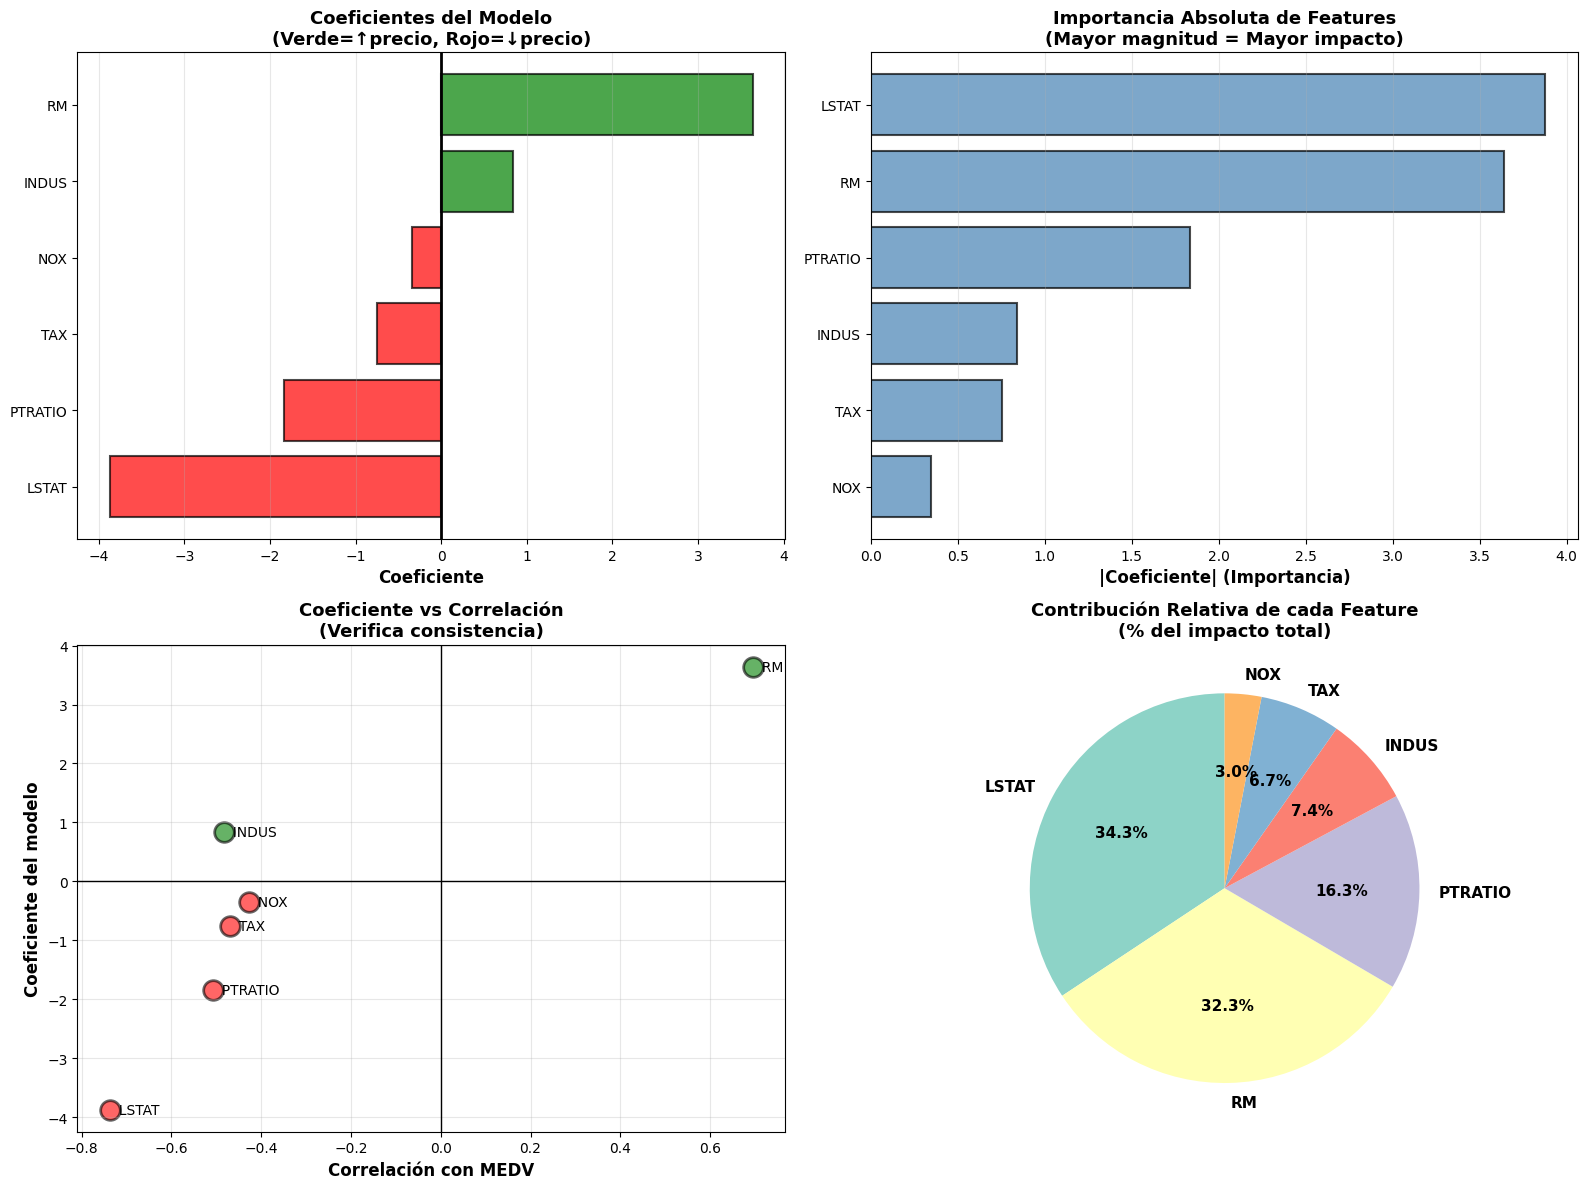

In [83]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# GRÁFICO 1: Coeficientes ordenados por magnitud
ax = axes[0, 0]
coef_sorted = coeficientes_df.sort_values('Coeficiente')
colors = ['red' if c < 0 else 'green' for c in coef_sorted['Coeficiente']]

ax.barh(coef_sorted['Feature'], coef_sorted['Coeficiente'], 
        color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax.axvline(x=0, color='black', linestyle='-', linewidth=2)
ax.set_xlabel('Coeficiente', fontsize=12, fontweight='bold')
ax.set_title('Coeficientes del Modelo\n(Verde=↑precio, Rojo=↓precio)', 
             fontsize=13, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# GRÁFICO 2: Importancia absoluta (magnitud)
ax = axes[0, 1]
coef_abs_sorted = coeficientes_df.sort_values('Abs_Coeficiente')
ax.barh(coef_abs_sorted['Feature'], coef_abs_sorted['Abs_Coeficiente'], 
        color='steelblue', alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_xlabel('|Coeficiente| (Importancia)', fontsize=12, fontweight='bold')
ax.set_title('Importancia Absoluta de Features\n(Mayor magnitud = Mayor impacto)', 
             fontsize=13, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# GRÁFICO 3: Comparación Coeficiente vs Correlación
ax = axes[1, 0]
for feature in coeficientes_df['Feature']:
    coef = coeficientes_df[coeficientes_df['Feature']==feature]['Coeficiente'].values[0]
    corr = correlaciones_originales[feature]
    color = 'green' if coef > 0 else 'red'
    ax.scatter(corr, coef, s=200, alpha=0.6, color=color, edgecolor='black', linewidth=2)
    ax.text(corr, coef, f'  {feature}', fontsize=10, va='center')

ax.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
ax.set_xlabel('Correlación con MEDV', fontsize=12, fontweight='bold')
ax.set_ylabel('Coeficiente del modelo', fontsize=12, fontweight='bold')
ax.set_title('Coeficiente vs Correlación\n(Verifica consistencia)', 
             fontsize=13, fontweight='bold')
ax.grid(alpha=0.3)

# GRÁFICO 4: Contribución porcentual
ax = axes[1, 1]
contribucion_pct = (coeficientes_df['Abs_Coeficiente'] / 
                    coeficientes_df['Abs_Coeficiente'].sum() * 100)
coeficientes_df['Contribucion_%'] = contribucion_pct.values

wedges, texts, autotexts = ax.pie(coeficientes_df['Contribucion_%'], 
                                    labels=coeficientes_df['Feature'],
                                    autopct='%1.1f%%',
                                    startangle=90,
                                    colors=plt.cm.Set3.colors,
                                    textprops={'fontsize': 11, 'fontweight': 'bold'})
ax.set_title('Contribución Relativa de cada Feature\n(% del impacto total)', 
             fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

In [85]:
print("\n3. ANÁLISIS DE SENSIBILIDAD")
print("-" * 70)
print("¿Cuánto cambia el precio si modificamos cada feature en 1 desviación estándar?")
print()

# Recordar: los datos están escalados, así que 1 unidad = 1 desviación estándar
for _, row in coeficientes_df.iterrows():
    feature = row['Feature']
    coef = row['Coeficiente']
    
    # En datos escalados, aumentar 1 unidad = aumentar 1 std
    cambio_precio = coef * 1  # Multiplicar por 1 std
    
    print(f"{feature:10} → Aumentar 1 std causa cambio de {cambio_precio:+.3f}k$ en el precio")

print("\n Ejemplo práctico:")
print(f"   Si una casa tiene 1 std MÁS de habitaciones (RM) que el promedio,")
print(f"   el precio aumenta aproximadamente {coeficientes_df[coeficientes_df['Feature']=='RM']['Coeficiente'].values[0]:.2f}k$")


3. ANÁLISIS DE SENSIBILIDAD
----------------------------------------------------------------------
¿Cuánto cambia el precio si modificamos cada feature en 1 desviación estándar?

LSTAT      → Aumentar 1 std causa cambio de -3.874k$ en el precio
RM         → Aumentar 1 std causa cambio de +3.641k$ en el precio
PTRATIO    → Aumentar 1 std causa cambio de -1.836k$ en el precio
INDUS      → Aumentar 1 std causa cambio de +0.840k$ en el precio
TAX        → Aumentar 1 std causa cambio de -0.756k$ en el precio
NOX        → Aumentar 1 std causa cambio de -0.343k$ en el precio

 Ejemplo práctico:
   Si una casa tiene 1 std MÁS de habitaciones (RM) que el promedio,
   el precio aumenta aproximadamente 3.64k$


In [89]:
print("\n4. RANKING DE IMPORTANCIA")

ranking = coeficientes_df[['Feature', 'Abs_Coeficiente', 'Contribucion_%']].copy()
ranking['Ranking'] = range(1, len(ranking) + 1)

print(f"\n{'Rank':<6} {'Feature':<12} {'|Coef|':<12} {'Contribución':<15}")


for _, row in ranking.iterrows():
    print(f"{int(row['Ranking']):<6} {row['Feature']:<12} "
          f"{row['Abs_Coeficiente']:<12.4f} {row['Contribucion_%']:<14.1f}%")


print(f"\nTop 3 features más importantes:")
top_3 = ranking.head(3)
for idx, row in top_3.iterrows():
    print(f"  {int(row['Ranking'])}. {row['Feature']} ({row['Contribucion_%']:.1f}% del impacto)")


4. RANKING DE IMPORTANCIA

Rank   Feature      |Coef|       Contribución   
1      LSTAT        3.8738       34.3          %
2      RM           3.6410       32.3          %
3      PTRATIO      1.8364       16.3          %
4      INDUS        0.8395       7.4           %
5      TAX          0.7558       6.7           %
6      NOX          0.3434       3.0           %

Top 3 features más importantes:
  1. LSTAT (34.3% del impacto)
  2. RM (32.3% del impacto)
  3. PTRATIO (16.3% del impacto)


     REGULARIZACIÓN: RIDGE Y LASSO

1. MODELOS DE REGULARIZACIÓN A PROBAR
Modelos a entrenar:
  - Ridge (L2) con alpha = 0.1, 1.0, 10.0
  - Lasso (L1) con alpha = 0.1, 1.0, 10.0

 Alpha controla la fuerza de la regularización:
   - Alpha pequeño (0.1) → poca regularización (similar a regresión lineal)
   - Alpha medio (1.0) → regularización moderada
   - Alpha grande (10.0) → mucha regularización (coeficientes más pequeños)

2. ENTRENANDO MODELOS RIDGE (L2)
 Ridge (α= 0.1) → R² test: 0.6210 | RMSE: 5.272k$
 Ridge (α= 1.0) → R² test: 0.6214 | RMSE: 5.269k$
 Ridge (α=10.0) → R² test: 0.6249 | RMSE: 5.245k$

3. ENTRENANDO MODELOS LASSO (L1)
 Lasso (α= 0.1) → R² test: 0.6277 | RMSE: 5.225k$ | Features eliminadas: 1/6
 Lasso (α= 1.0) → R² test: 0.6274 | RMSE: 5.227k$ | Features eliminadas: 3/6
 Lasso (α=10.0) → R² test: -0.0233 | RMSE: 8.663k$ | Features eliminadas: 6/6

4. COMPARACIÓN CON MODELO BASE

 TABLA COMPARATIVA DE TODOS LOS MODELOS:
          Modelo   R²_test  RMSE_test  MAE_test 

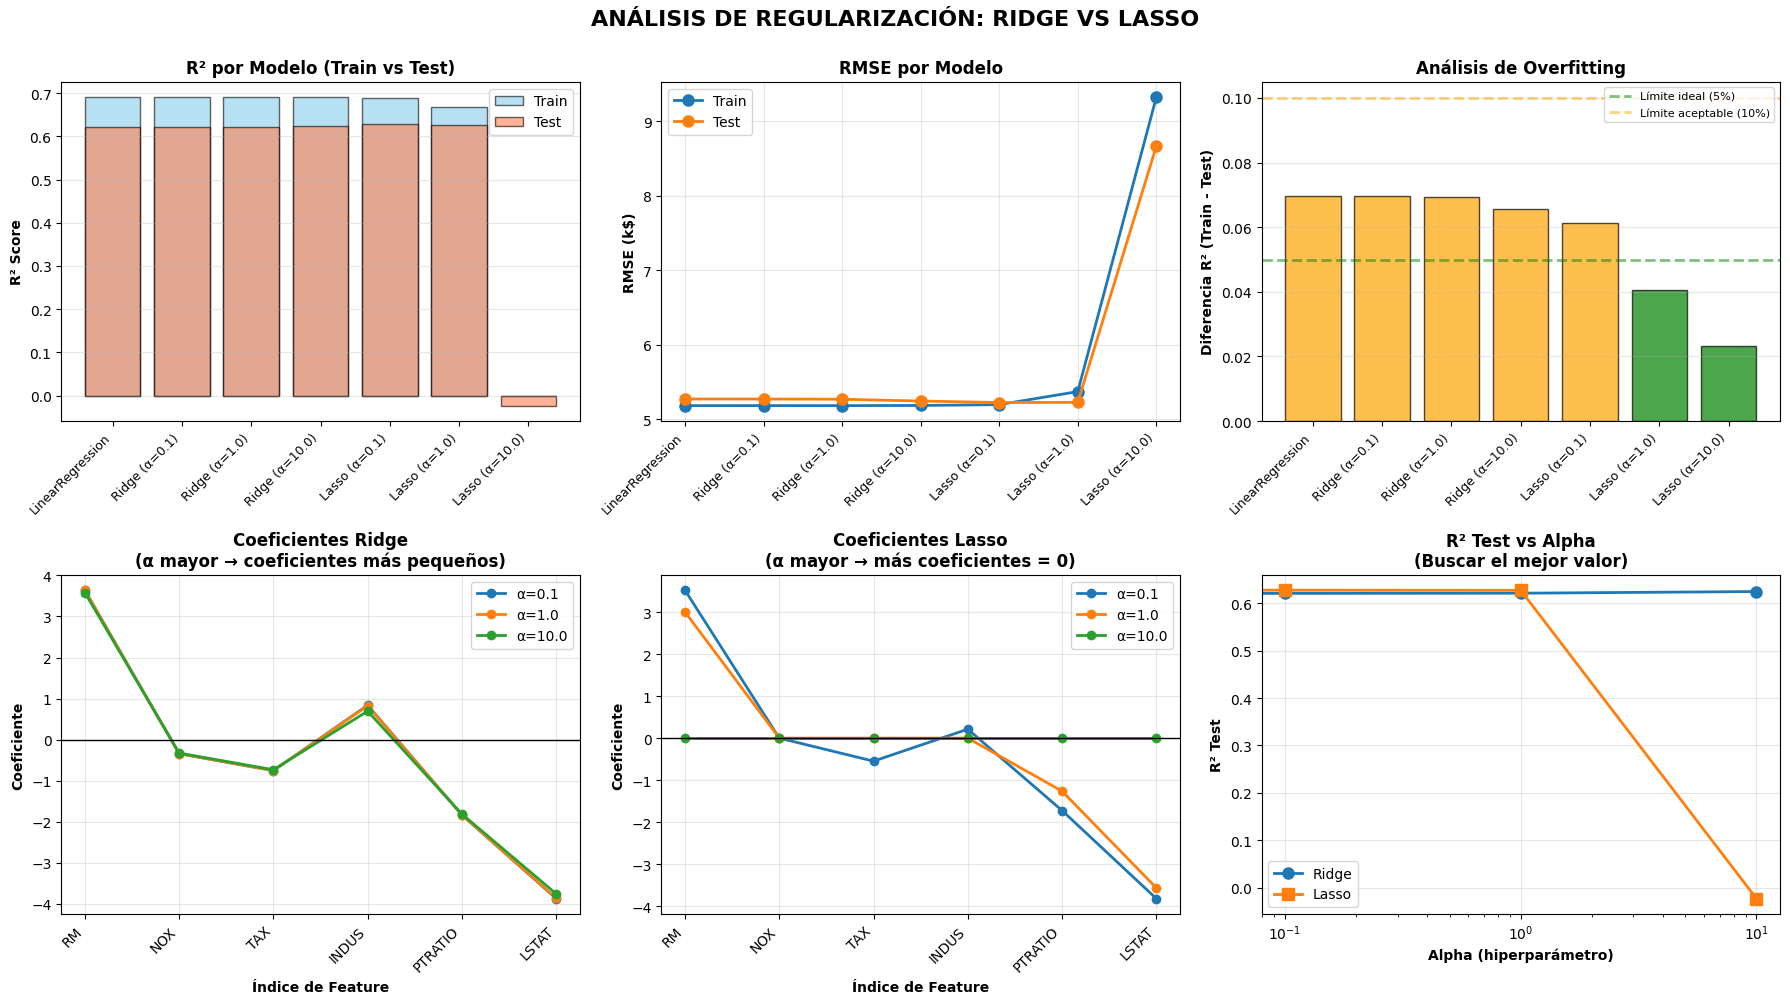


7. ANÁLISIS DEL MEJOR MODELO
Tipo: Lasso
Alpha óptimo: 0.1

Coeficientes del mejor modelo:
  LSTAT      | -3.8218
  RM         | +3.5220
  PTRATIO    | -1.7245
  TAX        | -0.5492
  INDUS      | +0.2119
  NOX        | -0.0000  ← ELIMINADA
REGULARIZACIÓN COMPLETADA


In [94]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



print("     REGULARIZACIÓN: RIDGE Y LASSO")


# ==========================================
# 1. DEFINIR MODELOS Y VALORES DE ALPHA
# ==========================================
print("\n1. MODELOS DE REGULARIZACIÓN A PROBAR")


# Valores de alpha a probar (hiperparámetro de regularización)
alphas = [0.1, 1.0, 10.0]

print("Modelos a entrenar:")
print("  - Ridge (L2) con alpha = 0.1, 1.0, 10.0")
print("  - Lasso (L1) con alpha = 0.1, 1.0, 10.0")
print("\n Alpha controla la fuerza de la regularización:")
print("   - Alpha pequeño (0.1) → poca regularización (similar a regresión lineal)")
print("   - Alpha medio (1.0) → regularización moderada")
print("   - Alpha grande (10.0) → mucha regularización (coeficientes más pequeños)")

# ==========================================
# 2. ENTRENAR MODELOS RIDGE
# ==========================================
print("\n2. ENTRENANDO MODELOS RIDGE (L2)")


modelos_ridge = {}
resultados_ridge = []

for alpha in alphas:
    # Crear y entrenar modelo
    modelo_ridge = Ridge(alpha=alpha, random_state=42)
    modelo_ridge.fit(X_train_scaled, y_train)
    
    # Guardar modelo
    modelos_ridge[f'Ridge_alpha_{alpha}'] = modelo_ridge
    
    # Predicciones
    y_train_pred = modelo_ridge.predict(X_train_scaled)
    y_test_pred = modelo_ridge.predict(X_test_scaled)
    
    # Métricas
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    resultados_ridge.append({
        'Modelo': f'Ridge (α={alpha})',
        'Alpha': alpha,
        'R²_train': r2_train,
        'R²_test': r2_test,
        'RMSE_train': rmse_train,
        'RMSE_test': rmse_test,
        'MAE_test': mae_test,
        'Diff_R²': r2_train - r2_test
    })
    
    print(f" Ridge (α={alpha:4.1f}) → R² test: {r2_test:.4f} | RMSE: {rmse_test:.3f}k$")

# ==========================================
# 3. ENTRENAR MODELOS LASSO
# ==========================================
print("\n3. ENTRENANDO MODELOS LASSO (L1)")


modelos_lasso = {}
resultados_lasso = []

for alpha in alphas:
    # Crear y entrenar modelo
    modelo_lasso = Lasso(alpha=alpha, random_state=42, max_iter=10000)
    modelo_lasso.fit(X_train_scaled, y_train)
    
    # Guardar modelo
    modelos_lasso[f'Lasso_alpha_{alpha}'] = modelo_lasso
    
    # Predicciones
    y_train_pred = modelo_lasso.predict(X_train_scaled)
    y_test_pred = modelo_lasso.predict(X_test_scaled)
    
    # Métricas
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    # Contar coeficientes = 0 (feature selection de Lasso)
    coef_zero = np.sum(modelo_lasso.coef_ == 0)
    
    resultados_lasso.append({
        'Modelo': f'Lasso (α={alpha})',
        'Alpha': alpha,
        'R²_train': r2_train,
        'R²_test': r2_test,
        'RMSE_train': rmse_train,
        'RMSE_test': rmse_test,
        'MAE_test': mae_test,
        'Diff_R²': r2_train - r2_test,
        'Coef_cero': coef_zero
    })
    
    print(f" Lasso (α={alpha:4.1f}) → R² test: {r2_test:.4f} | RMSE: {rmse_test:.3f}k$ | Features eliminadas: {coef_zero}/6")

# ==========================================
# 4. COMPARACIÓN CON REGRESIÓN LINEAL BASE
# ==========================================
print("\n4. COMPARACIÓN CON MODELO BASE")


# Añadir resultados del modelo lineal original
y_train_pred_base = modelo.predict(X_train_scaled)
y_test_pred_base = modelo.predict(X_test_scaled)

resultado_base = {
    'Modelo': 'LinearRegression',
    'Alpha': 0,
    'R²_train': r2_score(y_train, y_train_pred_base),
    'R²_test': r2_score(y_test, y_test_pred_base),
    'RMSE_train': np.sqrt(mean_squared_error(y_train, y_train_pred_base)),
    'RMSE_test': np.sqrt(mean_squared_error(y_test, y_test_pred_base)),
    'MAE_test': mean_absolute_error(y_test, y_test_pred_base),
    'Diff_R²': r2_score(y_train, y_train_pred_base) - r2_score(y_test, y_test_pred_base)
}

# Crear tabla comparativa
df_comparacion = pd.DataFrame([resultado_base] + resultados_ridge + resultados_lasso)

print("\n TABLA COMPARATIVA DE TODOS LOS MODELOS:")
print(df_comparacion[['Modelo', 'R²_test', 'RMSE_test', 'MAE_test', 'Diff_R²']].to_string(index=False))

# ==========================================
# 5. ENCONTRAR EL MEJOR MODELO
# ==========================================
print("\n5. MEJOR MODELO")


mejor_idx = df_comparacion['R²_test'].idxmax()
mejor_modelo = df_comparacion.loc[mejor_idx]

print(f" MEJOR MODELO: {mejor_modelo['Modelo']}")
print(f"   R² test:     {mejor_modelo['R²_test']:.4f}")
print(f"   RMSE test:   {mejor_modelo['RMSE_test']:.3f}k$")
print(f"   MAE test:    {mejor_modelo['MAE_test']:.3f}k$")
print(f"   Diferencia Train-Test: {mejor_modelo['Diff_R²']:.4f}")

# ==========================================
# 6. VISUALIZACIONES
# ==========================================
print("\n6. GENERANDO VISUALIZACIONES...")


fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# GRÁFICO 1: R² por modelo
ax = axes[0, 0]
x_pos = np.arange(len(df_comparacion))
ax.bar(x_pos, df_comparacion['R²_train'], alpha=0.6, label='Train', color='skyblue', edgecolor='black')
ax.bar(x_pos, df_comparacion['R²_test'], alpha=0.6, label='Test', color='coral', edgecolor='black')
ax.set_ylabel('R² Score', fontweight='bold')
ax.set_title('R² por Modelo (Train vs Test)', fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(df_comparacion['Modelo'], rotation=45, ha='right', fontsize=9)
ax.legend()
ax.grid(axis='y', alpha=0.3)

# GRÁFICO 2: RMSE por modelo
ax = axes[0, 1]
ax.plot(df_comparacion.index, df_comparacion['RMSE_train'], 
        'o-', label='Train', linewidth=2, markersize=8)
ax.plot(df_comparacion.index, df_comparacion['RMSE_test'], 
        'o-', label='Test', linewidth=2, markersize=8)
ax.set_ylabel('RMSE (k$)', fontweight='bold')
ax.set_title('RMSE por Modelo', fontweight='bold')
ax.set_xticks(df_comparacion.index)
ax.set_xticklabels(df_comparacion['Modelo'], rotation=45, ha='right', fontsize=9)
ax.legend()
ax.grid(alpha=0.3)

# GRÁFICO 3: Diferencia Train-Test (overfitting)
ax = axes[0, 2]
colors = ['green' if x < 0.05 else 'orange' if x < 0.10 else 'red' 
          for x in df_comparacion['Diff_R²']]
ax.bar(df_comparacion.index, df_comparacion['Diff_R²'], 
       color=colors, alpha=0.7, edgecolor='black')
ax.axhline(y=0.05, color='green', linestyle='--', linewidth=2, alpha=0.5, label='Límite ideal (5%)')
ax.axhline(y=0.10, color='orange', linestyle='--', linewidth=2, alpha=0.5, label='Límite aceptable (10%)')
ax.set_ylabel('Diferencia R² (Train - Test)', fontweight='bold')
ax.set_title('Análisis de Overfitting', fontweight='bold')
ax.set_xticks(df_comparacion.index)
ax.set_xticklabels(df_comparacion['Modelo'], rotation=45, ha='right', fontsize=9)
ax.legend(fontsize=8)
ax.grid(axis='y', alpha=0.3)

# GRÁFICO 4: Coeficientes Ridge
ax = axes[1, 0]
for i, alpha in enumerate(alphas):
    modelo_r = modelos_ridge[f'Ridge_alpha_{alpha}']
    ax.plot(range(len(modelo_r.coef_)), modelo_r.coef_, 
            'o-', label=f'α={alpha}', linewidth=2, markersize=6)
ax.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax.set_xlabel('Índice de Feature', fontweight='bold')
ax.set_ylabel('Coeficiente', fontweight='bold')
ax.set_title('Coeficientes Ridge\n(α mayor → coeficientes más pequeños)', fontweight='bold')
ax.set_xticks(range(len(X_train_scaled.columns)))
ax.set_xticklabels(X_train_scaled.columns, rotation=45, ha='right')
ax.legend()
ax.grid(alpha=0.3)

# GRÁFICO 5: Coeficientes Lasso
ax = axes[1, 1]
for i, alpha in enumerate(alphas):
    modelo_l = modelos_lasso[f'Lasso_alpha_{alpha}']
    ax.plot(range(len(modelo_l.coef_)), modelo_l.coef_, 
            'o-', label=f'α={alpha}', linewidth=2, markersize=6)
ax.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax.set_xlabel('Índice de Feature', fontweight='bold')
ax.set_ylabel('Coeficiente', fontweight='bold')
ax.set_title('Coeficientes Lasso\n(α mayor → más coeficientes = 0)', fontweight='bold')
ax.set_xticks(range(len(X_train_scaled.columns)))
ax.set_xticklabels(X_train_scaled.columns, rotation=45, ha='right')
ax.legend()
ax.grid(alpha=0.3)

# GRÁFICO 6: R² test vs Alpha
ax = axes[1, 2]
alphas_extended = [0] + alphas
r2_ridge = [resultado_base['R²_test']] + [r['R²_test'] for r in resultados_ridge]
r2_lasso = [resultado_base['R²_test']] + [r['R²_test'] for r in resultados_lasso]

ax.plot(alphas_extended, r2_ridge, 'o-', label='Ridge', linewidth=2, markersize=8)
ax.plot(alphas_extended, r2_lasso, 's-', label='Lasso', linewidth=2, markersize=8)
ax.set_xlabel('Alpha (hiperparámetro)', fontweight='bold')
ax.set_ylabel('R² Test', fontweight='bold')
ax.set_title('R² Test vs Alpha\n(Buscar el mejor valor)', fontweight='bold')
ax.set_xscale('log')
ax.legend()
ax.grid(alpha=0.3)

plt.suptitle('ANÁLISIS DE REGULARIZACIÓN: RIDGE VS LASSO', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# ==========================================
# 7. ANÁLISIS DETALLADO DEL MEJOR MODELO
# ==========================================
print("\n7. ANÁLISIS DEL MEJOR MODELO")


# Obtener el mejor modelo
if 'Ridge' in mejor_modelo['Modelo']:
    mejor_alpha = mejor_modelo['Alpha']
    mejor_modelo_obj = modelos_ridge[f'Ridge_alpha_{mejor_alpha}']
    tipo = 'Ridge'
elif 'Lasso' in mejor_modelo['Modelo']:
    mejor_alpha = mejor_modelo['Alpha']
    mejor_modelo_obj = modelos_lasso[f'Lasso_alpha_{mejor_alpha}']
    tipo = 'Lasso'
else:
    mejor_modelo_obj = modelo
    tipo = 'LinearRegression'

print(f"Tipo: {tipo}")
if tipo != 'LinearRegression':
    print(f"Alpha óptimo: {mejor_alpha}")

print("\nCoeficientes del mejor modelo:")
coef_mejor = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coeficiente': mejor_modelo_obj.coef_
}).sort_values('Coeficiente', key=abs, ascending=False)

for _, row in coef_mejor.iterrows():
    if row['Coeficiente'] == 0:
        print(f"  {row['Feature']:10} | {row['Coeficiente']:+.4f}  ← ELIMINADA")
    else:
        print(f"  {row['Feature']:10} | {row['Coeficiente']:+.4f}")

print("REGULARIZACIÓN COMPLETADA")



### 7. Conclusión final

El modelo desarrollado proporciona predicciones razonables del precio de 
viviendas con un error promedio de [X]k$ (aproximadamente [Y]% del precio medio). 

[Si regularización ayudó]:
La regularización demostró ser beneficiosa, mejorando la capacidad de 
generalización del modelo y [en el caso de Lasso: simplificando el modelo 
mediante selección automática de features].

[Si regularización no ayudó]:
La regularización no aportó mejoras significativas, sugiriendo que el modelo 
base ya está bien calibrado para este dataset específico.

Para aplicaciones en producción, [el modelo elegido] ofrece el mejor equilibrio 
entre precisión, simplicidad y generalización. Sin embargo, para mejorar 
significativamente el rendimiento, se recomienda explorar modelos no lineales 
más sofisticados.